# WeatherPy
----

#### Note
* Python script to visualize the weather of 500+ cities across the world of varying distance from the equator using CityPy, a simple Python library, and the OpenWeatherMap API.

The visualizations includce a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude Humidity (%) vs. Latitude Cloudiness (%) vs. Latitude Wind Speed (mph) vs. Latitude

The script accomplishes the following:

Randomly selects at least 500 unique (non-repeat) cities based on latitude and longitude.

Performs a weather check on each of the cities using a series of successive API calls.

Includes a print log of each city as it's being processed with the city number and city name.

Saves both a CSV of all data retrieved and png images for each scatter plot.

Observable Trends
Not surprisingly, temperature increases as we approach the equator. However, temperature peaks at around 20 degrees latitude, not exactly at the equatorial line. This may be due to the Earth's tilt in the axis known as obliquity.

Cloudiness and humidity do not show a strong correlation to latitude. The visualizations below show a great variety of values at similar latitudes.

Wind speed appears to slightly increase as we move away from the equator.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [17]:
## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count
print(len(cities_list))
cities_list

619


['talaya',
 'fairbanks',
 'provideniya',
 'upernavik',
 'moron',
 'la libertad',
 'amderma',
 'bredasdorp',
 'zalantun',
 'ponta do sol',
 'butaritari',
 'arraial do cabo',
 'tiksi',
 'yellowknife',
 'luderitz',
 'peniche',
 'busselton',
 'pacific grove',
 'mataura',
 'nautanwa',
 'codrington',
 'bambous virieux',
 'kysyl-syr',
 'myshkin',
 'ushuaia',
 'mys shmidta',
 'novobirilyussy',
 'punta arenas',
 'dingle',
 'wagga wagga',
 'barentsburg',
 'vaini',
 'bluff',
 'souillac',
 'namtsy',
 'nikolskoye',
 'puerto ayora',
 'san patricio',
 'inirida',
 'sistranda',
 'la grande',
 'airai',
 'port alfred',
 'san juan de arama',
 'pennagaram',
 'freeport',
 'cidreira',
 'vaitupu',
 'guerrero negro',
 'rikitea',
 'viligili',
 'cosmesti',
 'tasiilaq',
 'hohhot',
 'mazatlan',
 'cairns',
 'biak',
 'pevek',
 'ola',
 'bengkulu',
 'kemerovo',
 'magomeni',
 'kodiak',
 'jamestown',
 'sovetsk',
 'faanui',
 'taolanaro',
 'moerai',
 'coquimbo',
 'bageshwar',
 'wahiawa',
 'avarua',
 'adeje',
 'hobart',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# an API call is made up of a couple of things
# 1.) base url -> location, everything after the base url -> 'order' configuration
# 2.) send the order
# 3.) do something with the returned object

# 1.) URL
# parts:            location        |      configuration...                  password                    specifics

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=kawalu"

# send the order, receive back the finished goods
kawalu_data = requests.get(url).json()
kawalu_data

{'coord': {'lon': 108.21, 'lat': -7.38},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 65.77,
  'pressure': 1012.75,
  'humidity': 85,
  'temp_min': 65.77,
  'temp_max': 65.77,
  'sea_level': 1012.75,
  'grnd_level': 945.07},
 'wind': {'speed': 3.8, 'deg': 38.375},
 'clouds': {'all': 47},
 'dt': 1564097364,
 'sys': {'message': 0.0059,
  'country': 'ID',
  'sunrise': 1564095632,
  'sunset': 1564137992},
 'timezone': 25200,
 'id': 1640902,
 'name': 'Kawalu',
 'cod': 200}

In [20]:
# process the order -> City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
compact_data = {
    'City': kawalu_data['name'],
    'Cloudiness': kawalu_data['clouds']['all'],
    'Country': kawalu_data['sys']['country'],
    'Date': kawalu_data['dt'],
    'Humidity': kawalu_data['main']['humidity'],
    'Lat': kawalu_data['coord']['lat'],
    'Lng': kawalu_data['coord']['lon'],
    'Max Temp': kawalu_data['main']['temp_max'],
    'Wind Speed': kawalu_data['wind']['speed']
}

compact_data

{'City': 'Kawalu',
 'Cloudiness': 47,
 'Country': 'ID',
 'Date': 1564097364,
 'Humidity': 85,
 'Lat': -7.38,
 'Lng': 108.21,
 'Max Temp': 65.77,
 'Wind Speed': 3.8}

In [21]:
# OpenWeatherMap API Key
# api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities_list:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Talaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=talaya
Processing Record 2 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=fairbanks
Processing Record 3 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=provideniya
Processing Record 4 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=upernavik
Processing Record 5 | Moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=moron
Processing Record 6 | La Libertad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=la libertad
City not found. Skipping...
Processing Record 7 | Bredasdorp
http://api.openwea

Processing Record 56 | Magomeni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=magomeni
Processing Record 57 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=kodiak
Processing Record 58 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=jamestown
Processing Record 59 | Sovetsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=sovetsk
Processing Record 60 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=faanui
City not found. Skipping...
Processing Record 61 | Moerai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=moerai
Processing Record 62 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80

Processing Record 112 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=atuona
Processing Record 113 | Pacifica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=pacifica
Processing Record 114 | Husavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=husavik
Processing Record 115 | ChengDe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=chengde
City not found. Skipping...
Processing Record 116 | Kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=kavieng
City not found. Skipping...
Processing Record 117 | Riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=riyadh
City not found. Skipping...
Processing Record 118 | Yeppoon
http://api.openweathermap.or

Processing Record 167 | Yinchuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=yinchuan
Processing Record 168 | Amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=amapa
City not found. Skipping...
Processing Record 169 | Tarakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=tarakan
Processing Record 170 | Kavali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=kavali
Processing Record 171 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=cape town
Processing Record 172 | Naryan-Mar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=naryan-mar
Processing Record 173 | Quibdo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8d

Processing Record 222 | Niamey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=niamey
Processing Record 223 | Varhaug
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=varhaug
Processing Record 224 | Sidney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=sidney
Processing Record 225 | Tagab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=tagab
Processing Record 226 | Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=bonavista
Processing Record 227 | Alice Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=alice springs
Processing Record 228 | Jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=j

Processing Record 278 | Livramento
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=livramento
Processing Record 279 | Ginir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=ginir
Processing Record 280 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=bethel
Processing Record 281 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=iqaluit
Processing Record 282 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=port lincoln
Processing Record 283 | Tanabe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=tanabe
City not found. Skipping...
Processing Record 284 | Westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f

Processing Record 333 | Hermiston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=hermiston
Processing Record 334 | Labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=labuhan
Processing Record 335 | Victor Harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=victor harbor
Processing Record 336 | Marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=marzuq
Processing Record 337 | Avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=avera
Processing Record 338 | Omsukchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=omsukchan
Processing Record 339 | Panaba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f4

City not found. Skipping...
Processing Record 389 | Bom Jesus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=bom jesus
Processing Record 390 | Concepcion del Oro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=concepcion del oro
Processing Record 391 | Mitu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=mitu
Processing Record 392 | Farafangana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=farafangana
Processing Record 393 | Nevsehir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=nevsehir
Processing Record 394 | Vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=vostok
Processing Record 395 | Manzhouli
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 445 | Adre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=adre
Processing Record 446 | Dillon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=dillon
Processing Record 447 | Gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=gamba
Processing Record 448 | Senador Jose Porfirio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=senador jose porfirio
Processing Record 449 | Swan River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=swan river
Processing Record 450 | Strezhevoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=strezhevoy
Processing Record 451 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e4

Processing Record 500 | Baft
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=baft
Processing Record 501 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=bilibino
City not found. Skipping...
Processing Record 502 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=muros
Processing Record 503 | San Andres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=san andres
Processing Record 504 | Mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=mecca
Processing Record 505 | Ocampo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=ocampo
Processing Record 506 | Ahuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee803

Processing Record 557 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=hasaki
Processing Record 558 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=constitucion
Processing Record 559 | Stromness
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65d8f4f8dee7e491ee80385d694f48f3&q=stromness


In [22]:
city_name

['Talaya',
 'Fairbanks',
 'Provideniya',
 'Upernavik',
 'Moron',
 'La Libertad',
 'Bredasdorp',
 'Zalantun',
 'Ponta do Sol',
 'Butaritari',
 'Arraial do Cabo',
 'Tiksi',
 'Yellowknife',
 'Luderitz',
 'Peniche',
 'Busselton',
 'Pacific Grove',
 'Mataura',
 'Nautanwa',
 'Codrington',
 'Bambous Virieux',
 'Kysyl-Syr',
 'Myshkin',
 'Ushuaia',
 'Novobirilyussy',
 'Punta Arenas',
 'Dingle',
 'Wagga Wagga',
 'Vaini',
 'Bluff',
 'Souillac',
 'Namtsy',
 'Nikolskoye',
 'Puerto Ayora',
 'San Patricio',
 'Inirida',
 'Sistranda',
 'La Grande',
 'Airai',
 'Port Alfred',
 'San Juan de Arama',
 'Pennagaram',
 'Freeport',
 'Cidreira',
 'Guerrero Negro',
 'Rikitea',
 'Cosmesti',
 'Tasiilaq',
 'Hohhot',
 'Mazatlan',
 'Cairns',
 'Biak',
 'Pevek',
 'Ola',
 'Kemerovo',
 'Magomeni',
 'Kodiak',
 'Jamestown',
 'Sovetsk',
 'Faanui',
 'Moerai',
 'Coquimbo',
 'Bageshwar',
 'Wahiawa',
 'Avarua',
 'Adeje',
 'Hobart',
 'Hilo',
 'Blackwater',
 'Mahebourg',
 'Mar del Plata',
 'Geraldton',
 'New Norfolk',
 'Dikson',
 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# make dictionary for pandas to read
city_data = {
    'name': city_name,
    'cloudiness': cloudiness,
    'country': country,
    'date': date,
    'humidity': humidity,
    'lat': lat,
    'lng': lng,
    'max temp': max_temp,
    'wind speed': wind_speed,
}

In [34]:
city_df = pd.DataFrame(city_data)
city_df

,name,cloudiness,country,date,humidity,lat,lng,max temp,wind speed
0,Talaya,40,RU,1564097383,93,55.79,84.89,59.00,4.47
1,Fairbanks,90,US,1564097383,63,64.84,-147.72,68.00,4.70
2,Provideniya,90,RU,1564097384,87,64.42,-173.23,51.80,4.47
3,Upernavik,10,GL,1564097385,68,72.79,-56.15,41.87,5.64
4,Moron,73,HT,1564097386,79,18.56,-74.26,81.25,2.48
5,La Libertad,0,PE,1564097387,24,-16.38,-71.56,57.20,5.82
6,Bredasdorp,52,ZA,1564097389,82,-34.53,20.04,55.40,2.24
7,Zalantun,69,CN,1564097390,83,48.00,122.72,63.40,2.93
8,Ponta do Sol,62,BR,1564097391,60,-20.63,-46.00,62.66,4.54
9,Butaritari,57,KI,1564097392,69,3.07,172.79,84.78,10.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Max_Temp_vs_Latitude.png'

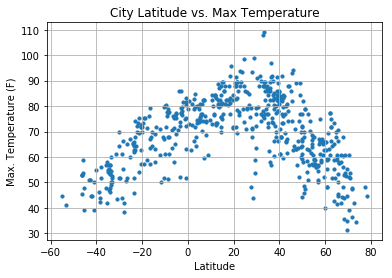

In [35]:
# Build a scatter plot for each data type
plt.scatter(city_data["lat"], city_data["max temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Humidity_vs_Latitude.png'

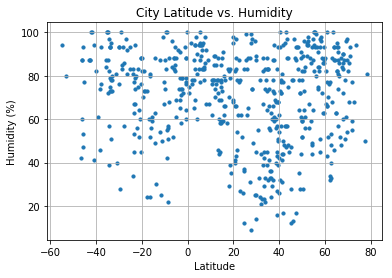

In [36]:
# Build a scatter plot for each data type
plt.scatter(city_data["lat"], city_data["humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Cloudiness_vs_Latitude.png'

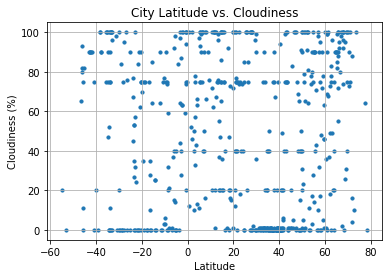

In [37]:
# Build a scatter plot for each data type
plt.scatter(city_data["lat"], city_data["cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output_Plots/Wind_Speed_vs_Latitude.png'

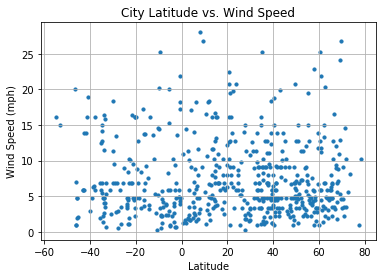

In [39]:
# Build a scatter plot for each data type
plt.scatter(city_data["lat"], city_data["wind speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()